In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 8
radius = 6371e3 #m
height = 3000e3 #m
geostat = 35786e3 #m
top = geostat+1000e3
bottom = radius+height
tether_coords = np.c_[np.zeros([N,2]),np.linspace(bottom,top,N)] #m
tether_velocity = np.zeros_like(tether_coords) #m/s
G = 6.674e-11
M = 5.972e24 #kg
l = np.sqrt(np.sum((tether_coords[1,:]-tether_coords[0,:])**2)) #length of one tether part
massper = 1e-3 #kg/m of tether
m = massper*l #mass of one segment

#tether_velocity[:,0]=0.00025*(tether_coords[:,2]) #m/s #e.g. top = 
#0.00025 too high
#0.00023 too low
#0.000246 too high
#0.000241 too low
#0.000244 a bit too high
#0.0002435 a bit too high
#0.0002431 a bit too high
tether_velocity[:,0]=0.0002431*(tether_coords[:,2]) #m/s #e.g. top = 

hookes_constant = 1e6 #F = kd how much force stretching by 1m will cause.
timestep = 0.02 #s

In [83]:
def plot():
    plt.plot(tether_coords[:,0],tether_coords[:,2],'.-k')
    earth = plt.Circle((0, 0), radius, edgecolor='k', facecolor='#ffffff')
    fig = plt.gcf()
    ax = fig.gca()
    plt.xlim([-50000e3,50000e3])
    plt.ylim([-50000e3,50000e3])
    ax.add_artist(earth)

In [84]:
np.set_printoptions(suppress=True, precision=4)


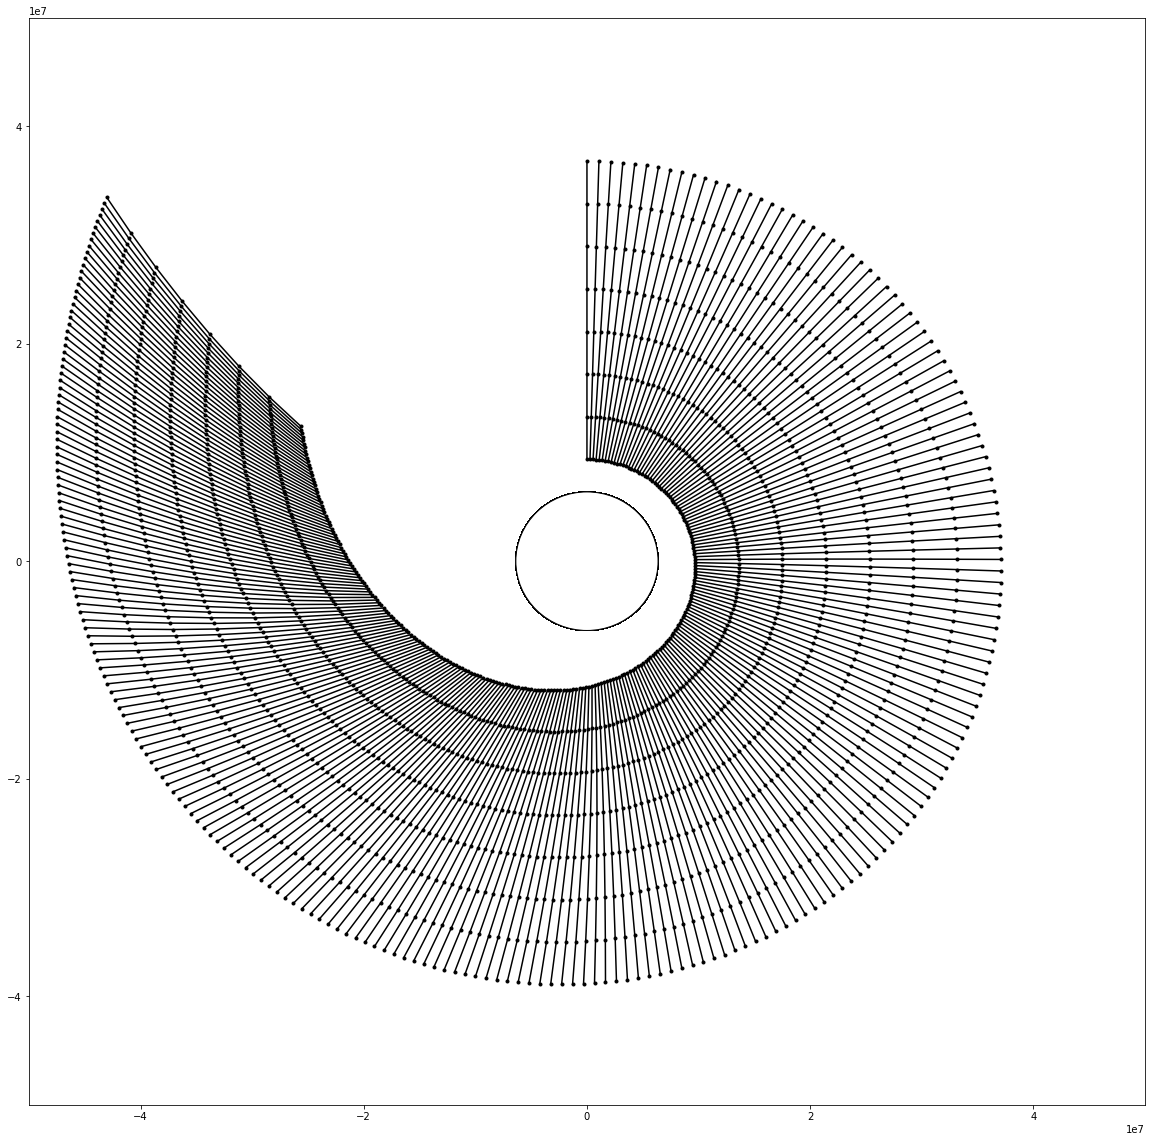

In [85]:
plt.figure(figsize=[20,20])
for it in range(3600*400):
    tether_coords += tether_velocity*timestep
    #distances from earth (0,0,0=earth centre)
    sqrdist = np.sum((tether_coords**2),1)
    unitearthdir = tether_coords/np.repeat(np.sqrt(np.sum(tether_coords**2,1))[:,None],3,1)
    F = -unitearthdir*np.repeat((G*M*m/sqrdist)[:,None],3,1)
    
    tethervectors = np.diff(tether_coords,axis=0)
    tetherlengths = np.sqrt(np.sum(tethervectors**2,1))
    tetherlengtherror = tetherlengths - l
    unittethervectors = tethervectors/np.repeat(tetherlengths[:,None],3,1)
    F[0:-1,:]+=hookes_constant*unittethervectors*np.repeat(tetherlengtherror[:,None],3,1)
    F[1:,:]-=hookes_constant*unittethervectors*np.repeat(tetherlengtherror[:,None],3,1)
    a = F/m
    tether_velocity+=a*timestep
    if it%(100*60)==0:
        plot()